<a href="https://colab.research.google.com/github/ashwinidverma/AD-Classifier-/blob/main/AD_Classifier_datamearged.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# prompt: lode data.xlsx

import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('/content/Data_mearged.xlsx')

# Print the DataFrame
print(df)


      Sample           Diagnostic Sex   Age  MMSE  CSF_Amyloid  CSF_Total_tau  \
0          1  Alzheimer's Disease   F  68.0    26        688.0          369.0   
1          2  Alzheimer's Disease   F  66.0    22        489.0          482.0   
2          3  Alzheimer's Disease   F  72.0    23        509.0          329.0   
3          4  Alzheimer's Disease   M  73.0    25        544.0          482.0   
4          5  Alzheimer's Disease   F  75.0    15        303.0          806.0   
...      ...                  ...  ..   ...   ...          ...            ...   
1261    5070           053_S_5070   M  71.2    26         64.2           62.5   
1262    5078           041_S_5078   F  67.4    30         42.1           13.7   
1263    5082           041_S_5082   M  69.2    30         48.0           14.2   
1264    5083           027_S_5083   M  73.7    28         64.7           19.2   
1265    5087           033_S_5087   F  64.6    25        194.5          145.5   

      CSF_Phosphorylated ta

In [ ]:
df=df.dropna()
df

,Sample,Diagnostic,Sex,Age,MMSE,CSF_Amyloid,CSF_Total_tau,CSF_Phosphorylated tau,diff,Target
0,1,Alzheimer's Disease,F,68.0,26,688.0,369.0,107.0,262.0,2
1,2,Alzheimer's Disease,F,66.0,22,489.0,482.0,176.0,306.0,2
2,3,Alzheimer's Disease,F,72.0,23,509.0,329.0,114.0,215.0,2
3,4,Alzheimer's Disease,M,73.0,25,544.0,482.0,80.0,402.0,2
4,5,Alzheimer's Disease,F,75.0,15,303.0,806.0,120.0,686.0,2
...,...,...,...,...,...,...,...,...,...,...
1261,5070,053_S_5070,M,71.2,26,64.2,62.5,107.6,-45.1,2
1262,5078,041_S_5078,F,67.4,30,42.1,13.7,177.4,-163.7,0
1263,5082,041_S_5082,M,69.2,30,48.0,14.2,200.9,-186.7,0
1264,5083,027_S_5083,M,73.7,28,64.7,19.2,148.8,-129.6,0


In [ ]:
# prompt: train a randomforest classifier usinf M/F,Hand,Age,Educ,SES,MMSE of df as feature and CDR as traget

from sklearn.ensemble import RandomForestClassifier
df['M/F'] = df['M/F'].replace({'M': 0, 'F': 1})
#df['CDR'] = df['CDR'].replace({0: 0, 0.5: 1, 1 : 1,2:1})

KeyError: 'M/F'

In [ ]:
df.col

,Data,M/F,Age,MMSE,Target
0,OASSIS,1,74.0,29,0
1,OASSIS,1,55.0,29,0
2,OASSIS,1,73.0,27,1
3,OASSIS,0,74.0,30,0
4,OASSIS,1,52.0,30,0
...,...,...,...,...,...
1206,Clinical,1,74.0,28,0
1207,Clinical,1,76.0,28,0
1208,Clinical,1,67.0,30,0
1209,Clinical,0,71.0,29,0


array([[<Axes: title={'center': 'M/F'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'MMSE'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

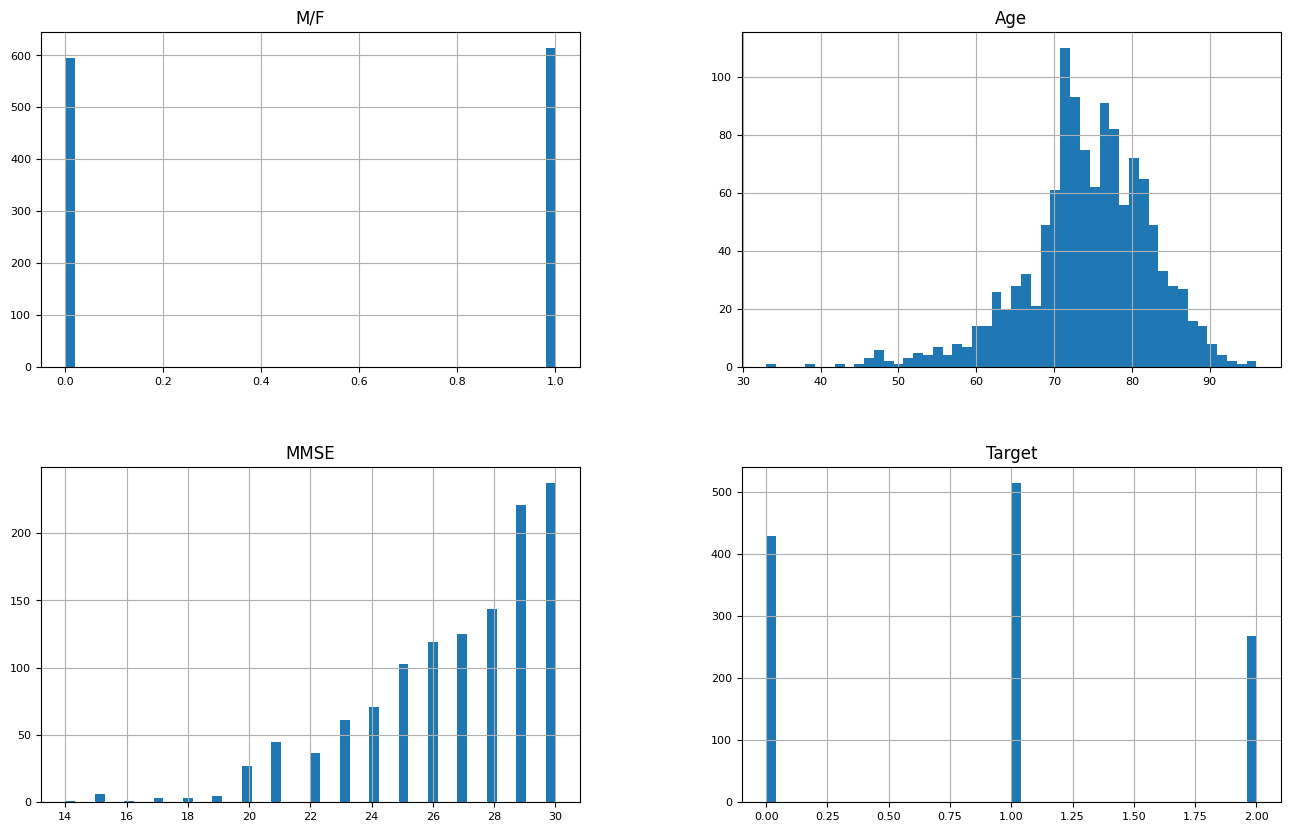

In [ ]:
df[['M/F',  'Age', 'MMSE','Target',]].hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load and Preprocess Data
# Using Iris dataset as an example

features = ['M/F',  'Age',  'MMSE']
target = 'Target'

X = df[features]
y = df[target]
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
cor = df[['M/F',  'Age',  'MMSE','Target']]

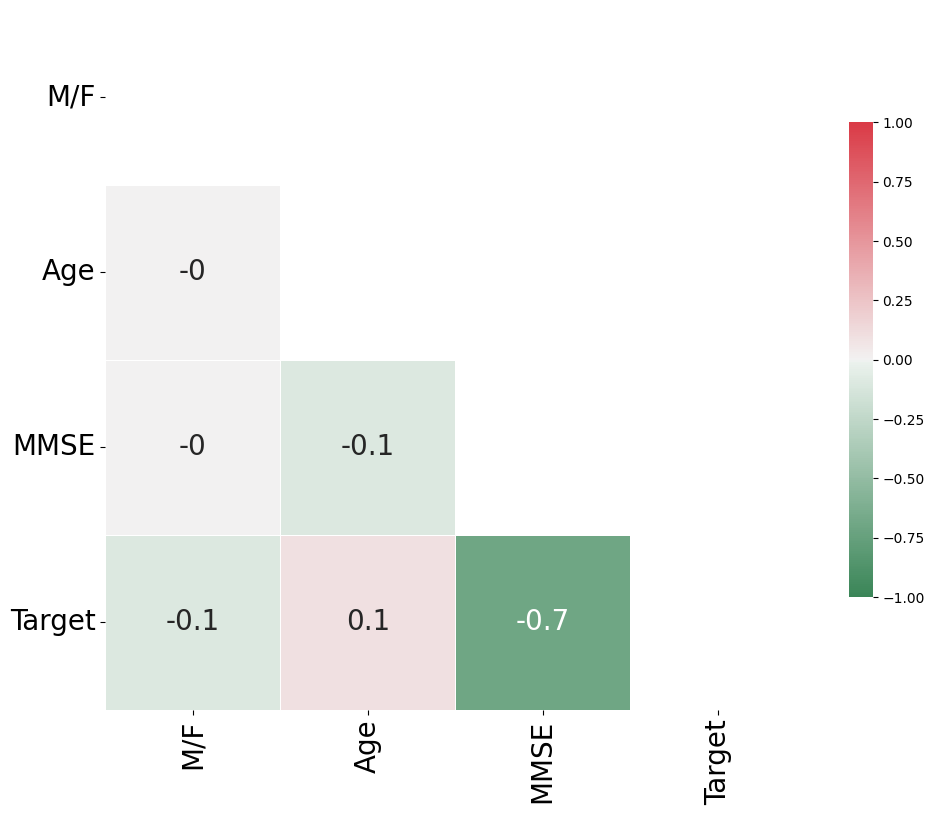

In [ ]:
cor.corr()
f, ax = plt.subplots(figsize=(10,10))
corr=cor.corr().round(1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidth = 0.5, cbar_kws={"shrink":0.5}, annot=True,annot_kws={"size": 20})
plt.yticks(fontsize=20, rotation=0)
plt.xticks(fontsize=20,rotation=90)
plt.tight_layout()

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        92
           1       0.53      0.58      0.56        93
           2       0.68      0.53      0.59        57

    accuracy                           0.63       242
   macro avg       0.64      0.62      0.63       242
weighted avg       0.64      0.63      0.63       242

Confusion Matrix:
[[69 22  1]
 [26 54 13]
 [ 2 25 30]]
Accuracy: 0.6322314049586777
Feature Importances: [0.03750781 0.41507029 0.5474219 ]


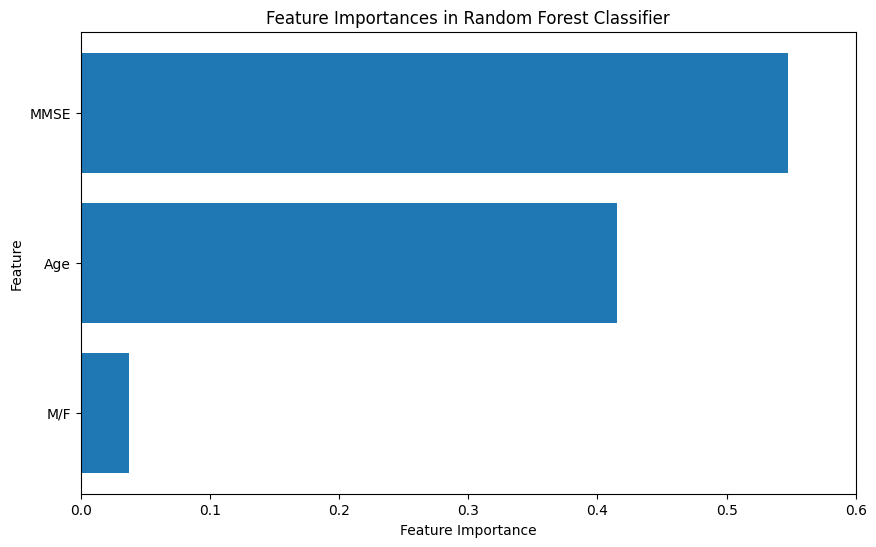

In [ ]:

# 2. Train the Model
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=300, max_depth=18,
                            min_samples_split=10, random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# 3. Make Predictions
# Predict on the test data
y_pred = clf.predict(X_test)

# 4. Evaluate the Model
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 5. Feature Importances (Optional)
# Print feature importances
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)

# Plot feature importances (Optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.xlim(0,0.6)
plt.title('Feature Importances in Random Forest Classifier')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.78        92
           1       0.57      0.63      0.60        93
           2       0.78      0.44      0.56        57

    accuracy                           0.67       242
   macro avg       0.69      0.64      0.65       242
weighted avg       0.68      0.67      0.66       242

Confusion Matrix:
[[78 14  0]
 [27 59  7]
 [ 2 30 25]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid search
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm_classifier.decision_function(X_test))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


ValueError: multi_class must be in ('ovo', 'ovr')

In [ ]:
from sklearn.metrics import classification_report

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.78        92
           1       0.57      0.63      0.60        93
           2       0.78      0.44      0.56        57

    accuracy                           0.67       242
   macro avg       0.69      0.64      0.65       242
weighted avg       0.68      0.67      0.66       242



In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(svm_classifier, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.2f}")

Cross-Validation Scores: [0.65702479 0.67768595 0.7107438  0.68595041 0.63900415]
Mean CV Score: 0.67


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Create the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=((200,200)),alpha= 0.05,  max_iter=300, learning_rate= 'constant',activation='tanh', solver='adam', random_state=42)

# Train the classifier
mlp_classifier.fit(X_train, y_train)


MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(200, 200),
              max_iter=300, random_state=42)

In [ ]:
y_pred = mlp_classifier.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        92
           1       0.56      0.57      0.57        93
           2       0.78      0.44      0.56        57

    accuracy                           0.65       242
   macro avg       0.68      0.62      0.63       242
weighted avg       0.66      0.65      0.64       242

Confusion Matrix:
[[79 13  0]
 [33 53  7]
 [ 4 28 25]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Grid search
grid_search = GridSearchCV(MLPClassifier(max_iter=300, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_mlp_classifier = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters: {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
df

,Sample,Diagnostic,Sex,Age,MMSE,CSF_Amyloid,CSF_Total_tau,CSF_Phosphorylated tau,diff,Target
0,1,Alzheimer's Disease,1,68.0,26,688.0,369.0,107.0,262.0,2
1,2,Alzheimer's Disease,1,66.0,22,489.0,482.0,176.0,306.0,2
2,3,Alzheimer's Disease,1,72.0,23,509.0,329.0,114.0,215.0,2
3,4,Alzheimer's Disease,0,73.0,25,544.0,482.0,80.0,402.0,2
4,5,Alzheimer's Disease,1,75.0,15,303.0,806.0,120.0,686.0,2
...,...,...,...,...,...,...,...,...,...,...
1261,5070,053_S_5070,0,71.2,26,64.2,62.5,107.6,-45.1,2
1262,5078,041_S_5078,1,67.4,30,42.1,13.7,177.4,-163.7,0
1263,5082,041_S_5082,0,69.2,30,48.0,14.2,200.9,-186.7,0
1264,5083,027_S_5083,0,73.7,28,64.7,19.2,148.8,-129.6,0


In [ ]:
X = df[features].to_numpy()
y = df[target].to_numpy()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split into training and test sets
train_size = int(0.8 * len(X_tensor))
test_size = len(X_tensor) - train_size
train_dataset, test_dataset = random_split(TensorDataset(X_tensor, y_tensor), [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

In [ ]:
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()
        self.fc1 = nn.Linear(3, 10)  # Input layer (3 features), 1st hidden layer (10 neurons)
        self.fc2 = nn.Linear(10, 10) # 2nd hidden layer (10 neurons)
        self.fc3 = nn.Linear(10, 2)  # Output layer (2 classes for binary classification)

    def forward(self, x):
        x = F.relu(self.fc1(x))   # Apply ReLU activation function after 1st hidden layer
        x = F.relu(self.fc2(x))   # Apply ReLU activation function after 2nd hidden layer
        x = self.fc3(x)           # Output layer
        return x

# Instantiate the model
model = ANNClassifier()


In [ ]:
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()
        self.fc1 = nn.Linear(3, 20)  # Input layer (2 features), 1st hidden layer (10 neurons)
        self.fc2 = nn.Linear(20, 20) # 2nd hidden layer (10 neurons)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 3)  # Output layer (2 classes)

    def forward(self, x):
        x = F.tanh(self.fc1(x))   # Apply ReLU activation function after 1st hidden layer
        x = F.tanh(self.fc2(x))   # Apply ReLU activation function after 2nd hidden layer
        x = F.tanh(self.fc3(x))
        x = self.fc4(x)           # Output layer
        return x

# Instantiate the model
model = ANNClassifier()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [ ]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()        # Zero the parameter gradients
        outputs = model(inputs)       # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()              # Backward pass
        optimizer.step()             # Optimize the weights

        running_loss += loss.item()

    if (epoch+1) % 2 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [2/50], Loss: 0.7596
Epoch [4/50], Loss: 0.7407
Epoch [6/50], Loss: 0.7615
Epoch [8/50], Loss: 0.7466
Epoch [10/50], Loss: 0.7545
Epoch [12/50], Loss: 0.7294
Epoch [14/50], Loss: 0.7453
Epoch [16/50], Loss: 0.7360
Epoch [18/50], Loss: 0.7412
Epoch [20/50], Loss: 0.7287
Epoch [22/50], Loss: 0.7372
Epoch [24/50], Loss: 0.7322
Epoch [26/50], Loss: 0.7291
Epoch [28/50], Loss: 0.7265
Epoch [30/50], Loss: 0.7362
Epoch [32/50], Loss: 0.7402
Epoch [34/50], Loss: 0.7346
Epoch [36/50], Loss: 0.7397
Epoch [38/50], Loss: 0.7391
Epoch [40/50], Loss: 0.7150
Epoch [42/50], Loss: 0.7416
Epoch [44/50], Loss: 0.7366
Epoch [46/50], Loss: 0.7473
Epoch [48/50], Loss: 0.7184
Epoch [50/50], Loss: 0.7233


Confusion Matrix:
[[ 25  33   0]
 [ 14 109   6]
 [  0  21  46]]
Accuracy: 0.6378
Confusion Matrix:
[[25 27  0]
 [32 89 24]
 [ 0  9 48]]


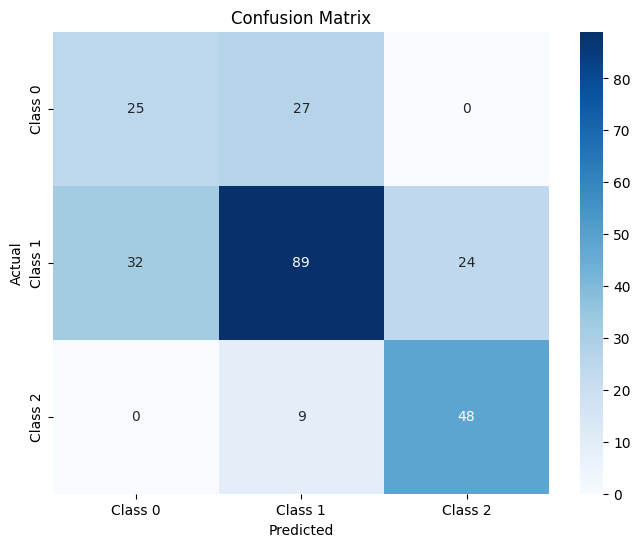

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
model.eval()  # Set the model to evaluation mode
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.6860
Confusion Matrix:
[[69  8  1]
 [35 52 14]
 [ 2 16 45]]


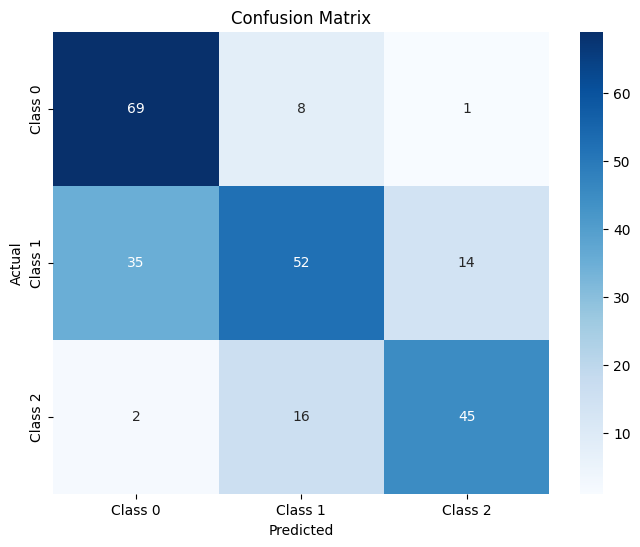

In [ ]:
train_losses = []
val_losses = []
val_accuracies = []

best_loss = float('inf')
patience = 10
trigger_times = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Average training loss for the epoch
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Average validation loss and accuracy
    val_loss /= len(test_loader)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered!")
            break


Epoch [1/50], Train Loss: 0.7341, Val Loss: 0.7343, Val Accuracy: 0.6488
Epoch [2/50], Train Loss: 0.7380, Val Loss: 0.6915, Val Accuracy: 0.6570
Epoch [3/50], Train Loss: 0.7521, Val Loss: 0.6786, Val Accuracy: 0.6942
Epoch [4/50], Train Loss: 0.7587, Val Loss: 0.7238, Val Accuracy: 0.7107
Epoch [5/50], Train Loss: 0.7294, Val Loss: 0.9250, Val Accuracy: 0.5579
Epoch [6/50], Train Loss: 0.7239, Val Loss: 0.7115, Val Accuracy: 0.6736
Epoch [7/50], Train Loss: 0.7296, Val Loss: 0.7255, Val Accuracy: 0.6653
Epoch [8/50], Train Loss: 0.7619, Val Loss: 0.7467, Val Accuracy: 0.6240
Epoch [9/50], Train Loss: 0.7455, Val Loss: 0.7513, Val Accuracy: 0.6033
Epoch [10/50], Train Loss: 0.7398, Val Loss: 0.7406, Val Accuracy: 0.6364
Epoch [11/50], Train Loss: 0.7295, Val Loss: 0.7322, Val Accuracy: 0.6570
Epoch [12/50], Train Loss: 0.7521, Val Loss: 0.7699, Val Accuracy: 0.5909
Epoch [13/50], Train Loss: 0.7233, Val Loss: 0.6744, Val Accuracy: 0.6860
Epoch [14/50], Train Loss: 0.7188, Val Loss: 0.

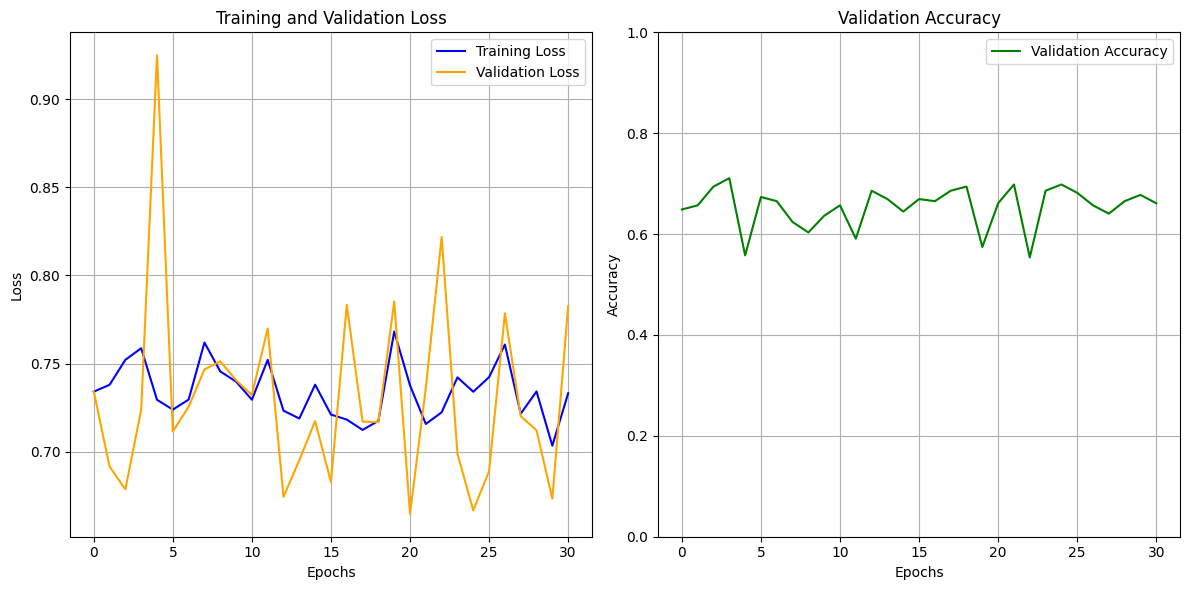

In [ ]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plotting validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
# prompt: lode data.xlsx

import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('/content/Clinical_Addira_ADANI_clinical.xlsx')

# Print the DataFrame
print(df)

      Sample           Diagnostic Sex   Age  MMSE  CSF_Amyloid  CSF_Total_tau  \
0          1  Alzheimer's Disease   F  68.0    26        688.0          369.0   
1          2  Alzheimer's Disease   F  66.0    22        489.0          482.0   
2          3  Alzheimer's Disease   F  72.0    23        509.0          329.0   
3          4  Alzheimer's Disease   M  73.0    25        544.0          482.0   
4          5  Alzheimer's Disease   F  75.0    15        303.0          806.0   
...      ...                  ...  ..   ...   ...          ...            ...   
1261    5070           053_S_5070   M  71.2    26         64.2           62.5   
1262    5078           041_S_5078   F  67.4    30         42.1           13.7   
1263    5082           041_S_5082   M  69.2    30         48.0           14.2   
1264    5083           027_S_5083   M  73.7    28         64.7           19.2   
1265    5087           033_S_5087   F  64.6    25        194.5          145.5   

      CSF_Phosphorylated ta

In [ ]:
from sklearn.ensemble import RandomForestClassifier
df['Sex'] = df['Sex'].replace({'M': 0, 'F': 1})
#df['CDR'] = df['CDR'].replace({0: 0, 0.5: 1, 1 : 1,2:1})

In [ ]:
df.columns

Index(['Sample', 'Diagnostic', 'Sex', 'Age', 'MMSE', 'CSF_Amyloid',
       'CSF_Total_tau', 'CSF_Phosphorylated tau', 'diff', 'Target'],
      dtype='object')

array([[<Axes: title={'center': 'Sample'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'MMSE'}>,
        <Axes: title={'center': 'CSF_Amyloid'}>,
        <Axes: title={'center': 'CSF_Total_tau'}>],
       [<Axes: title={'center': 'CSF_Phosphorylated tau'}>,
        <Axes: title={'center': 'diff'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

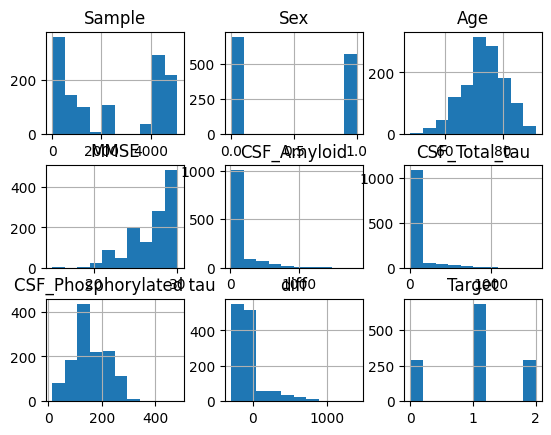

In [ ]:
df.hist()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load and Preprocess Data
# Using Iris dataset as an example

features = ['Sex', 'Age', 'MMSE', 'CSF_Amyloid',
       'CSF_Total_tau', 'CSF_Phosphorylated tau', 'diff']
target = 'Target'

X = df[features]
y = df[target]
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
cor = df[['Target','Sex', 'Age', 'MMSE', 'CSF_Amyloid',
       'CSF_Total_tau', 'CSF_Phosphorylated tau', 'diff']]

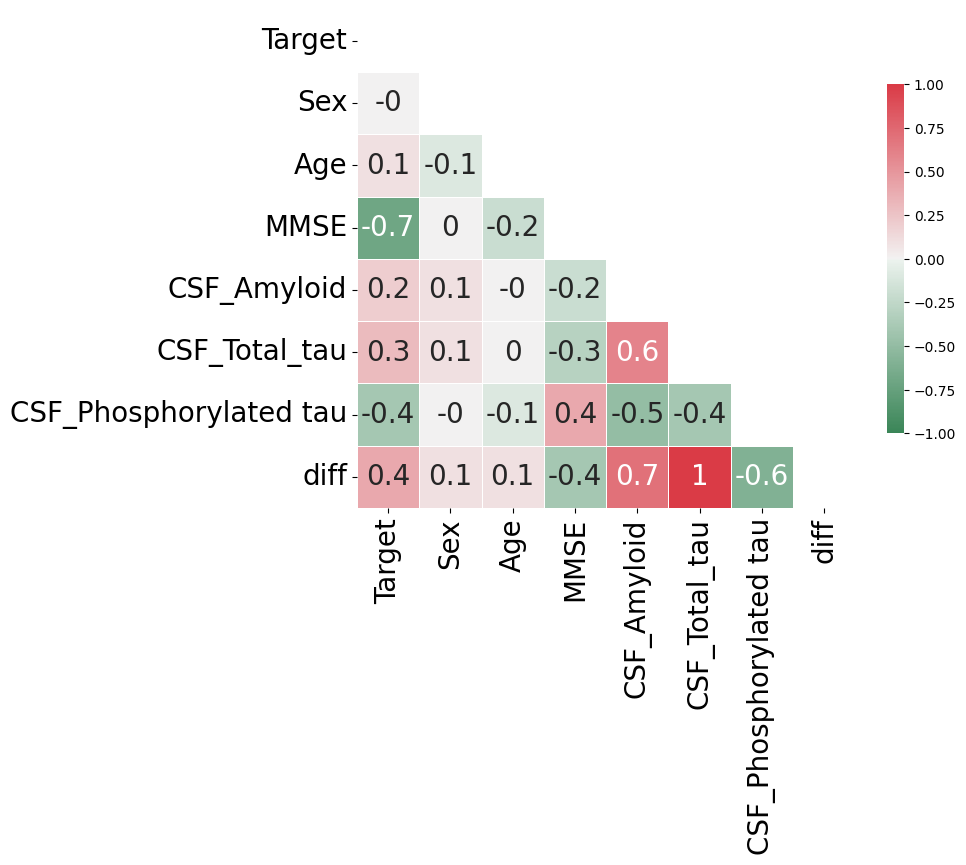

In [ ]:
cor.corr()
f, ax = plt.subplots(figsize=(10,10))
corr=cor.corr().round(1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidth = 0.5, cbar_kws={"shrink":0.5}, annot=True,annot_kws={"size": 20})
plt.yticks(fontsize=20, rotation=0)
plt.xticks(fontsize=20,rotation=90)
plt.tight_layout()

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.43      0.52        58
           1       0.67      0.84      0.75       129
           2       0.88      0.69      0.77        67

    accuracy                           0.71       254
   macro avg       0.73      0.65      0.68       254
weighted avg       0.72      0.71      0.70       254

Confusion Matrix:
[[ 25  33   0]
 [ 14 109   6]
 [  0  21  46]]
Accuracy: 0.7086614173228346
Feature Importances: [0.01546493 0.13713716 0.33112297 0.14328502 0.10994842 0.12944088
 0.13360062]


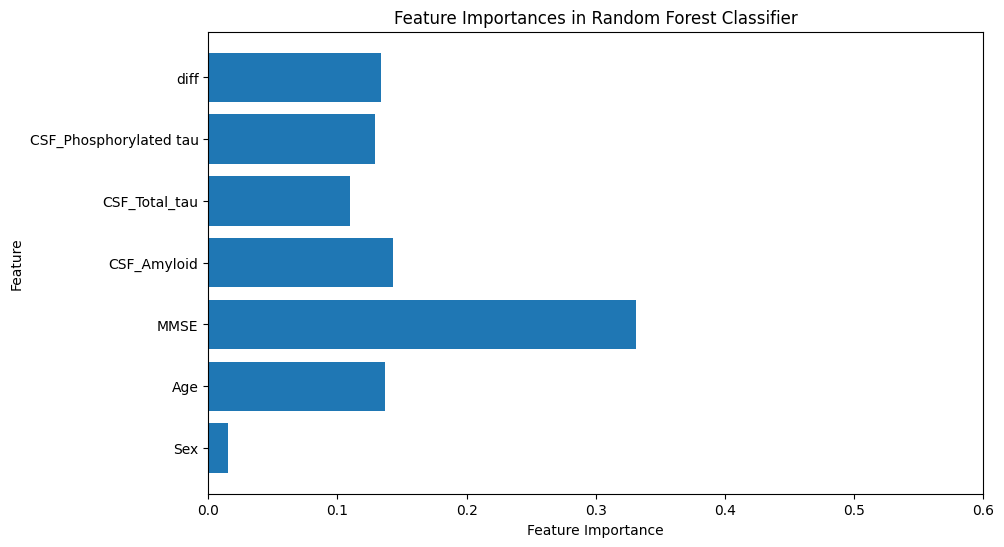

In [ ]:
# 2. Train the Model
# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=300, max_depth=18,
                            min_samples_split=10, random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# 3. Make Predictions
# Predict on the test data
y_pred = clf.predict(X_test)

# 4. Evaluate the Model
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 5. Feature Importances (Optional)
# Print feature importances
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)

# Plot feature importances (Optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.xlim(0,0.6)
plt.title('Feature Importances in Random Forest Classifier')
plt.show()

In [ ]:
X = df[features].to_numpy()
y = df[target].to_numpy()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Split into training and test sets
train_size = int(0.8 * len(X_tensor))
test_size = len(X_tensor) - train_size
train_dataset, test_dataset = random_split(TensorDataset(X_tensor, y_tensor), [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

In [ ]:
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()
        self.fc1 = nn.Linear(7, 10)  # Input layer (3 features), 1st hidden layer (10 neurons)
        self.fc2 = nn.Linear(10, 10) # 2nd hidden layer (10 neurons)
        self.fc3 = nn.Linear(10, 3)  # Output layer (2 classes for binary classification)

    def forward(self, x):
        x = F.relu(self.fc1(x))   # Apply ReLU activation function after 1st hidden layer
        x = F.relu(self.fc2(x))   # Apply ReLU activation function after 2nd hidden layer
        x = self.fc3(x)           # Output layer
        return x

# Instantiate the model
model = ANNClassifier()


In [ ]:
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()
        self.fc1 = nn.Linear(7, 32)  # Input layer (2 features), 1st hidden layer (10 neurons)
        self.fc2 = nn.Linear(32, 32) # 2nd hidden layer (10 neurons)
        #self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(32, 3)  # Output layer (2 classes)

    def forward(self, x):
        x = F.tanh(self.fc1(x))   # Apply ReLU activation function after 1st hidden layer
        x = F.tanh(self.fc2(x))   # Apply ReLU activation function after 2nd hidden layer
        #x = F.tanh(self.fc3(x))
        x = self.fc4(x)           # Output layer
        return x

# Instantiate the model
model = ANNClassifier()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()        # Zero the parameter gradients
        outputs = model(inputs)       # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()              # Backward pass
        optimizer.step()             # Optimize the weights

        running_loss += loss.item()

    if (epoch+1) % 1 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/50], Loss: 0.7433
Epoch [2/50], Loss: 0.6462
Epoch [3/50], Loss: 0.6377
Epoch [4/50], Loss: 0.6319
Epoch [5/50], Loss: 0.6286
Epoch [6/50], Loss: 0.6275
Epoch [7/50], Loss: 0.6233
Epoch [8/50], Loss: 0.6221
Epoch [9/50], Loss: 0.6164
Epoch [10/50], Loss: 0.6151
Epoch [11/50], Loss: 0.6145
Epoch [12/50], Loss: 0.6102
Epoch [13/50], Loss: 0.6084
Epoch [14/50], Loss: 0.6053
Epoch [15/50], Loss: 0.6022
Epoch [16/50], Loss: 0.6025
Epoch [17/50], Loss: 0.6026
Epoch [18/50], Loss: 0.6018
Epoch [19/50], Loss: 0.6003
Epoch [20/50], Loss: 0.5927
Epoch [21/50], Loss: 0.5946
Epoch [22/50], Loss: 0.5924
Epoch [23/50], Loss: 0.5930
Epoch [24/50], Loss: 0.5887
Epoch [25/50], Loss: 0.5879
Epoch [26/50], Loss: 0.5894
Epoch [27/50], Loss: 0.5852
Epoch [28/50], Loss: 0.5849
Epoch [29/50], Loss: 0.5850
Epoch [30/50], Loss: 0.5784
Epoch [31/50], Loss: 0.5787
Epoch [32/50], Loss: 0.5758
Epoch [33/50], Loss: 0.5768
Epoch [34/50], Loss: 0.5754
Epoch [35/50], Loss: 0.5725
Epoch [36/50], Loss: 0.5718
E